In [0]:
# https://www.kaggle.com/code/iqbalsyahakbar/optiver-a-starter-s-notebook

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [46]:
data_path = '../../data/'
train_df = pd.read_csv(data_path+'train.csv')
test_df = pd.read_csv(data_path+'test.csv')
submission_df = pd.read_csv(data_path+'sample_submission.csv')
target_df = pd.read_csv(data_path+'revealed_targets.csv')

In [6]:
import matplotlib.pyplot as plt
round(train_df['time_id'].describe(), 2)

count    5237980.00
mean       13310.05
std         7619.27
min            0.00
25%         6729.00
50%        13345.00
75%        19907.00
max        26454.00
Name: time_id, dtype: float64

In [7]:
round(test_df['time_id'].describe(), 2)

count    33000.00
mean     26372.00
std         47.63
min      26290.00
25%      26331.00
50%      26372.00
75%      26413.00
max      26454.00
Name: time_id, dtype: float64

In [8]:
round(target_df['revealed_time_id'].describe(), 2)

count    33000.00
mean     26317.00
std         47.63
min      26235.00
25%      26276.00
50%      26317.00
75%      26358.00
max      26399.00
Name: revealed_time_id, dtype: float64

In [9]:
train_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [10]:
train_df[(train_df['stock_id']==0) & (train_df['date_id']==477)].loc[:, ['target', 'time_id']]

,target,time_id
5193980,-2.310276,26235
5194180,-7.200241,26236
5194380,-7.500052,26237
5194580,-12.480021,26238
5194780,-9.570122,26239
5194980,-9.859800,26240
5195180,-10.719895,26241
5195380,-3.319979,26242
5195580,-2.890229,26243
5195780,1.640320,26244


In [11]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0
1,1,478,0,985977.11,-1,1.000245,3850033.97,NaN,NaN,0.999940,1967.90,1.000601,19692.00,1.000000,26290,478_0_1
2,2,478,0,599128.74,1,1.000584,4359198.25,NaN,NaN,0.999918,4488.22,1.000636,34955.12,1.000000,26290,478_0_2
3,3,478,0,2872317.54,-1,0.999802,27129551.64,NaN,NaN,0.999705,16082.04,1.000189,10314.00,1.000000,26290,478_0_3
4,4,478,0,740059.14,-1,0.999886,8880890.78,NaN,NaN,0.999720,19012.35,1.000107,7245.60,1.000000,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,26454,480_540_195
32996,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,26454,480_540_196
32997,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,26454,480_540_197
32998,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,26454,480_540_198


In [12]:
target_df[(target_df['stock_id']==0) & (target_df['date_id']==478)]

,stock_id,date_id,seconds_in_bucket,time_id,revealed_target,revealed_date_id,revealed_time_id
0,0.0,478,0,26290,-2.310276,477.0,26235.0
200,0.0,478,10,26290,-7.200241,477.0,26236.0
400,0.0,478,20,26290,-7.500052,477.0,26237.0
600,0.0,478,30,26290,-12.480021,477.0,26238.0
800,0.0,478,40,26290,-9.570122,477.0,26239.0
1000,0.0,478,50,26290,-9.859800,477.0,26240.0
1200,0.0,478,60,26290,-10.719895,477.0,26241.0
1400,0.0,478,70,26290,-3.319979,477.0,26242.0
1600,0.0,478,80,26290,-2.890229,477.0,26243.0
1800,0.0,478,90,26290,1.640320,477.0,26244.0


In [13]:
from sklearn.metrics import mean_squared_error
origin = train_df.loc[(train_df['stock_id']==2) & (train_df['date_id']==477), 'target']
revealed = target_df.loc[(target_df['stock_id']==2) & (target_df['date_id']==478), 'revealed_target']
mean_squared_error(origin,revealed)

0.0

In [14]:
train_df.iloc[-1]['time_id']

26454

In [15]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0
1,1,478,0,985977.11,-1,1.000245,3850033.97,NaN,NaN,0.999940,1967.90,1.000601,19692.00,1.000000,26290,478_0_1
2,2,478,0,599128.74,1,1.000584,4359198.25,NaN,NaN,0.999918,4488.22,1.000636,34955.12,1.000000,26290,478_0_2
3,3,478,0,2872317.54,-1,0.999802,27129551.64,NaN,NaN,0.999705,16082.04,1.000189,10314.00,1.000000,26290,478_0_3
4,4,478,0,740059.14,-1,0.999886,8880890.78,NaN,NaN,0.999720,19012.35,1.000107,7245.60,1.000000,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,26454,480_540_195
32996,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,26454,480_540_196
32997,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,26454,480_540_197
32998,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,26454,480_540_198


In [16]:
submission_df

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1


In [17]:
pd.set_option('display.float_format','{:.2f}'.format)
def show_summary(df_):
    print(df_.shape)
    summary_df = pd.DataFrame({'feature':df_.dtypes.index, 'type':df_.dtypes.values})
    summary_df['유니크개수'] = df_.nunique().values
    summary_df['결측치'] = df_.isnull().sum(axis=0).values
    describe = df_.describe().T
    summary_df.loc[(summary_df['type']!='object'), 'mean'] = describe['mean'].values
    summary_df.loc[(summary_df['type']!='object'), 'std'] = describe['std'].values
    summary_df.loc[(summary_df['type']!='object'), 'min'] = describe['min'].values
    summary_df.loc[(summary_df['type']!='object'), 'max'] = describe['max'].values
    summary_df['1th'] = df_.iloc[0].values
    r = np.random.randint(df_.shape[0]) # [0, length)
    summary_df[f'{r}th'] = df_.iloc[r].values
    summary_df.loc[(summary_df['type']=='object')] = summary_df.loc[(summary_df['type']=='object')].fillna(0)
    summary_df = round(summary_df, 1)
    return summary_df

In [18]:
train_df.duplicated().sum()

0

In [19]:
show_summary(train_df)

(5237980, 17)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,3684529th
0,stock_id,int64,200,0,99.30,57.90,0.00,199.00,0,149
1,date_id,int64,481,0,241.50,138.50,0.00,480.00,0,339
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0,420
3,imbalance_size,float64,2971863,220,5715293.10,20515906.30,0.00,2982027811.70,3180602.69,0.00
4,imbalance_buy_sell_flag,int64,3,0,-0.00,0.90,-1.00,1.00,1,0
5,reference_price,float64,28741,220,1.00,0.00,0.90,1.10,1.00,1.00
6,matched_size,float64,2948862,220,45100245.30,139841291.30,4316.60,7713682054.00,13380276.64,23298097.14
7,far_price,float64,95739,2894342,1.00,0.70,0.00,438.00,NaN,1.00
8,near_price,float64,84625,2857180,1.00,0.00,0.80,1.30,NaN,1.00
9,bid_price,float64,28313,220,1.00,0.00,0.90,1.10,1.00,1.00


In [20]:
show_summary(test_df)

(33000, 16)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,11054th
0,stock_id,int64,200,0,99.50,57.70,0.00,199.00,0,54
1,date_id,int64,3,0,479.00,0.80,478.00,480.00,478,479
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0,0
3,imbalance_size,float64,20327,0,6636938.90,18468274.40,0.00,478154802.30,3753451.43,8956186.83
4,imbalance_buy_sell_flag,int64,3,0,-0.10,0.90,-1.00,1.00,-1,-1
5,reference_price,float64,5733,0,1.00,0.00,1.00,1.00,1.00,1.00
6,matched_size,float64,18595,0,50988974.40,169510516.90,4316.60,2834016755.10,11548975.43,54496230.78
7,far_price,float64,4269,18229,1.00,0.00,0.80,1.40,NaN,NaN
8,near_price,float64,5461,18000,1.00,0.00,0.90,1.10,NaN,NaN
9,bid_price,float64,5464,0,1.00,0.00,1.00,1.00,1.00,1.00


In [21]:
show_summary(target_df)

(33162, 7)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,6673th
0,stock_id,float64,200,162,99.50,57.70,0.00,199.00,0.00,73.00
1,date_id,int64,3,0,479.00,0.80,478.00,480.00,478.00,478.00
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0.00,330.00
3,time_id,int64,165,0,26345.10,45.00,26290.00,26454.00,26290.00,26290.00
4,revealed_target,float64,4268,162,-0.20,8.00,-144.40,77.10,-2.30,-1.00
5,revealed_date_id,float64,3,162,478.00,0.80,477.00,479.00,477.00,477.00
6,revealed_time_id,float64,165,162,26317.00,47.60,26235.00,26399.00,26235.00,26268.00


In [22]:
train_df[train_df['date_id']>=478]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5204980,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,-5.43,26290,478_0_0
5204981,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,-1.87,26290,478_0_1
5204982,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,-0.09,26290,478_0_2
5204983,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,-7.61,26290,478_0_3
5204984,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,-3.29,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,2.31,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,-8.22,26454,480_540_196
5237977,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,1.17,26454,480_540_197
5237978,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,-1.54,26454,480_540_198


In [23]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,26290,478_0_0
1,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,26290,478_0_1
2,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,26290,478_0_2
3,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,26290,478_0_3
4,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,26454,480_540_195
32996,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,26454,480_540_196
32997,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,26454,480_540_197
32998,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,26454,480_540_198


In [24]:
submission_df

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1


In [25]:
s_per_c = train_df.groupby('stock_id')['row_id'].agg('count').reset_index().rename(columns={'row_id':'count'}).sort_values(by='count').reset_index(drop=True)
s_per_c['diff'] = s_per_c['count']-26455
s_per_c

,stock_id,count,diff
0,102,10230,-16225
1,135,15950,-10505
2,79,16500,-9955
3,199,21615,-4840
4,153,22605,-3850
...,...,...,...
195,76,26455,0
196,77,26455,0
197,7,26455,0
198,9,26455,0


In [26]:
sum(s_per_c['diff'])

-53020

In [27]:
train_df[(train_df['stock_id']==0) & (train_df['seconds_in_bucket']==300)]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0,1.00,26670118.88,1.00,1.00,1.00,19319.31,1.00,16149.55,1.00,-10.04,30,0_300_0
16235,0,1,300,2644684.00,1,1.00,11260472.63,1.02,1.01,1.00,93.01,1.00,6511.40,1.00,-5.59,85,1_300_0
26740,0,2,300,0.00,0,1.00,16122712.09,1.00,1.00,1.00,26052.98,1.00,11048.40,1.00,3.56,140,2_300_0
37245,0,3,300,9579868.86,-1,1.00,17509193.32,NaN,0.91,1.00,9201.00,1.00,2854.79,1.00,-3.87,195,3_300_0
47780,0,4,300,6129712.55,-1,1.00,25365589.39,0.98,0.98,1.00,9705.00,1.00,177480.52,1.00,-0.52,250,4_300_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188980,0,476,300,11186557.20,-1,1.00,33646348.46,0.95,0.96,1.00,12448.38,1.00,11636.00,1.00,2.76,26210,476_300_0
5199980,0,477,300,14673591.49,-1,1.00,24067387.64,NaN,0.93,1.00,46805.60,1.00,5709.00,1.00,-0.40,26265,477_300_0
5210980,0,478,300,2857934.36,-1,1.00,25665944.86,0.99,0.99,1.00,11367.18,1.00,37150.74,1.00,-8.09,26320,478_300_0
5221980,0,479,300,0.00,0,1.00,53431389.30,1.00,1.00,1.00,5750.00,1.00,28755.00,1.00,0.54,26375,479_300_0


# <추가적인 피쳐 정보>
* stock: 200개
* 피쳐수: 16개 + 타겟 1개
* train 기간: 0~480, 481일
* seconds_in_bucket
    * 0~540 (10씩 증가)
    * stock당 하루 55개의 data가 쌓임
    * 300부터는 far_price와 near_price가 존재함
* 일부 stock의 경우 데이터가 누락됨
    * 종목당 55*481 = 26455 개의 데이터가 있어야 함
    * 11개의 종목이 데이터가 누락됨(아래 그림 참고)
    * 총 length가 5,291,000(200*55*541)이 되어야 하지만 누락건수로 인해 5,237,980이 됨

In [ ]:
from matplotlib import gridspec

plt.figure(figsize=(10,4))
grid = gridspec.GridSpec(2,2)
ax0, ax1, ax2, ax3 = plt.subplot(grid[0]), plt.subplot(grid[1]), plt.subplot(grid[2]), plt.subplot(grid[3])

sns.lineplot(x=range(55), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[0:55], ax=ax0) # 0~55
sns.lineplot(x=range(55*2), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[0:55*2], ax=ax1) # 0~110, 55 변화 체크
sns.lineplot(x=range(55), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[55:55*2], ax=ax2) # 55~110
sns.lineplot(x=range(55*2), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[55:55*3], ax=ax3) # 55~165, 110 변화 체크
plt.show()

In [ ]:
# null 값 처리
# train_df['far_price'] = train_df['far_price'].fillna(0)
# train_df['near_price'] = train_df['near_price'].fillna(0)

In [ ]:
train_df.loc[train_df.isnull().any(axis=1)] # 220

In [ ]:
selected_features = ['seconds_in_bucket','imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_dataset = train_df[selected_features+['target']].dropna()
train_dataset = pd.concat([pd.DataFrame(scaler.fit_transform(train_dataset[selected_features]), columns=selected_features), train_dataset['target']], axis=1)

In [ ]:
train_dataset.tail()

In [ ]:
train_dataset.info()

<Axes: >

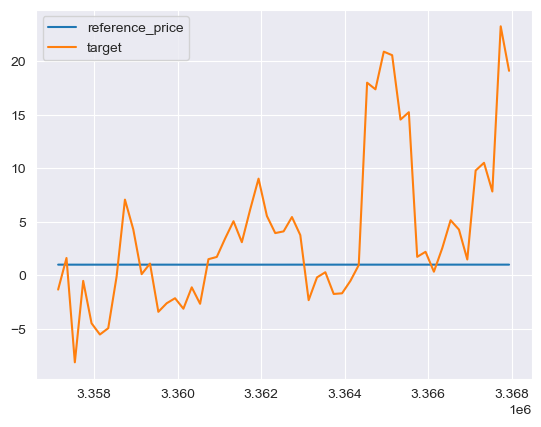

In [39]:
train_df.loc[(train_df['stock_id']==100) & (train_df['date_id']==310), ['reference_price', 'target']].plot()

In [49]:
train_df.groupby(['seconds_in_bucket'])[['target', 'reference_price']].agg('mean')

,target,reference_price
seconds_in_bucket,,
0,-0.08,1.00
10,0.05,1.00
20,0.10,1.00
30,0.13,1.00
40,0.17,1.00
50,0.16,1.00
60,0.18,1.00
70,-0.05,1.00
80,-0.09,1.00


In [81]:
train_df.loc[train_df['reference_price']!=1, 'reference_price']*100

0          99.98
1          99.99
2          99.96
3         100.02
4          99.95
           ...  
5237975   100.03
5237976   100.06
5237977    99.58
5237978    99.92
5237979   100.21
Name: reference_price, Length: 5232258, dtype: float64

<Axes: >

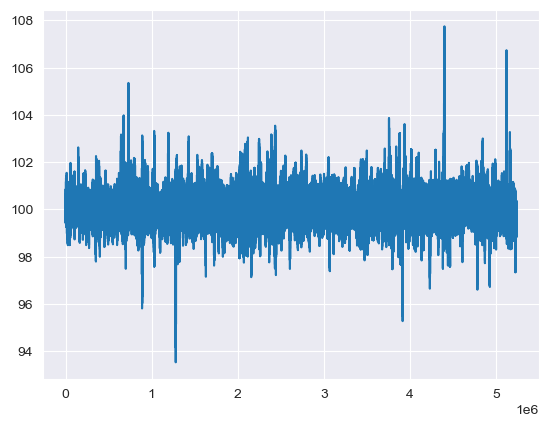

In [83]:
(train_df['reference_price']*100).plot()

<Axes: xlabel='reference_price', ylabel='Count'>

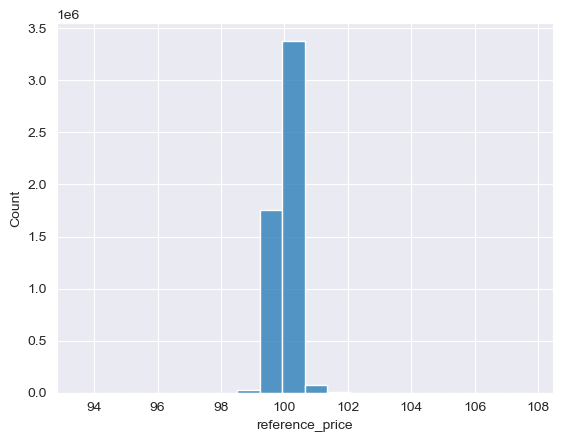

In [86]:
sns.histplot(x=train_df['reference_price']*100, bins=20)

<Axes: xlabel='reference_price', ylabel='Count'>

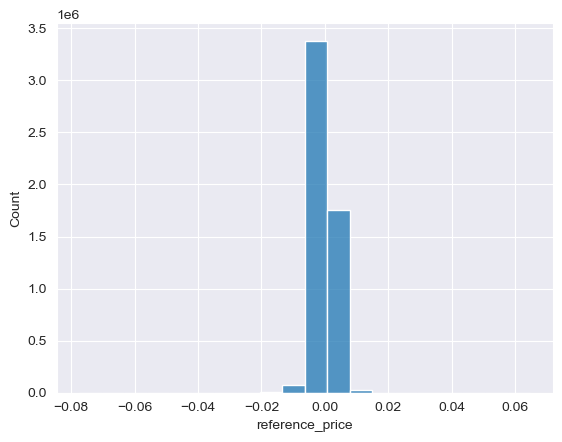

In [89]:
from sklearn.metrics import mean_squared_error
wap = (train_df['bid_price']*train_df['ask_size'] + train_df['ask_price']*train_df['bid_size']) / (train_df['bid_size']+train_df['ask_size']+1e-8)
mean_squared_error(wap, train_df['wap'])

ValueError: Input contains NaN.

In [98]:
wap[wap.isnull()==True]

369508    NaN
369700    NaN
369892    NaN
370084    NaN
370276    NaN
           ..
4774999   NaN
4775199   NaN
4775399   NaN
4775599   NaN
4775799   NaN
Length: 220, dtype: float64

In [105]:
train_df[(train_df['stock_id']==0)].groupby(['date_id'])['reference_price'].std()*1000

date_id
0     0.44
1     0.39
2     0.50
3     0.74
4     0.90
      ... 
476   0.88
477   0.72
478   0.46
479   0.77
480   0.55
Name: reference_price, Length: 481, dtype: float64

<Axes: >

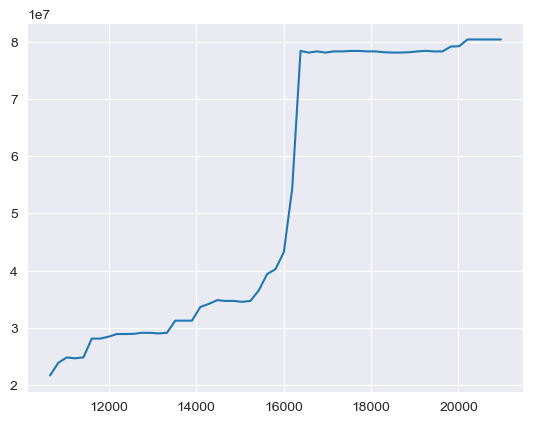

In [111]:
train_df[(train_df['stock_id']==160) & (train_df['date_id']==1)]['matched_size'].plot()

In [114]:
train_df[train_df['far_price']>train_df['near_price']]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5733,3,0,300,2914730.16,1,1.00,41057776.66,1.00,1.00,1.00,25569.50,1.00,37897.50,1.00,-4.34,30,0_300_3
5736,6,0,300,2290880.11,1,1.00,6222660.84,1.02,1.01,1.00,110949.94,1.00,476.41,1.00,-2.14,30,0_300_6
5738,8,0,300,3049995.87,1,1.00,21575575.33,1.02,1.01,1.00,6495.81,1.00,299433.78,1.00,0.73,30,0_300_8
5741,11,0,300,374944.29,1,1.00,4160566.03,1.01,1.00,1.00,3992.28,1.00,2585.00,1.00,14.99,30,0_300_11
5742,12,0,300,10700559.50,1,1.00,33782672.49,1.03,1.02,1.00,2632.63,1.00,1196.85,1.00,9.03,30,0_300_12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237967,187,480,540,3791745.66,1,1.00,33806277.48,1.00,1.00,1.00,24031.50,1.00,73788.88,1.00,0.29,26454,480_540_187
5237969,189,480,540,956757.96,1,1.00,37109375.25,1.00,1.00,1.00,788361.12,1.00,49599.20,1.00,6.96,26454,480_540_189
5237971,191,480,540,36937785.44,1,1.00,608326138.56,1.00,1.00,1.00,84744.00,1.00,48025.00,1.00,0.80,26454,480_540_191
5237972,192,480,540,67162.62,1,1.00,11790079.43,1.00,1.00,1.00,168412.86,1.00,69841.50,1.00,-1.73,26454,480_540_192


In [116]:
train_df[train_df['bid_price']>train_df['wap']]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id


In [117]:
train_df[train_df['ask_price']<train_df['wap']]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id


In [118]:
# https://www.kaggle.com/code/a27182818/explain-the-data-lightgbm-baseline/notebook
def time_series_plot(df, cols, stock_id, date_id):
    # A helper function to plot the time seires for a given stock in a given date
    (df
        .query(f'stock_id == {stock_id} & date_id == {date_id}')
        .loc[:, ['seconds_in_bucket'] + cols]
        # .replace(0, np.nan)
        .set_index('seconds_in_bucket')
        .plot(title=f'Stock {stock_id} on Day {date_id}', figsize=(10, 4), linewidth=1)
    )

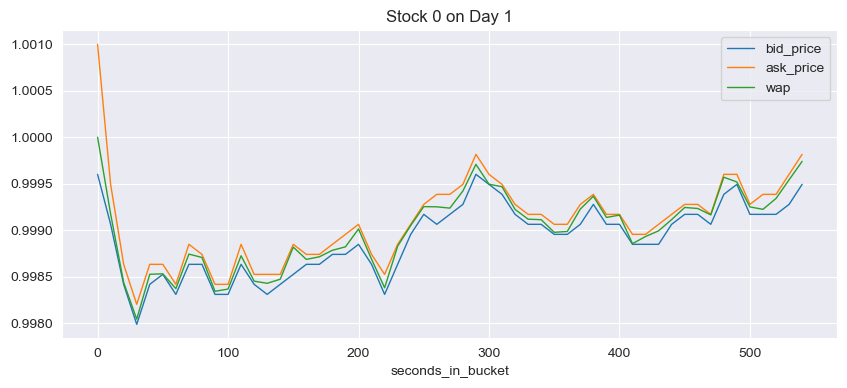

In [122]:
time_series_plot(
    df=train_df, 
    cols=['bid_price','ask_price', 'wap'], 
    stock_id = 0,
    date_id = 1
)

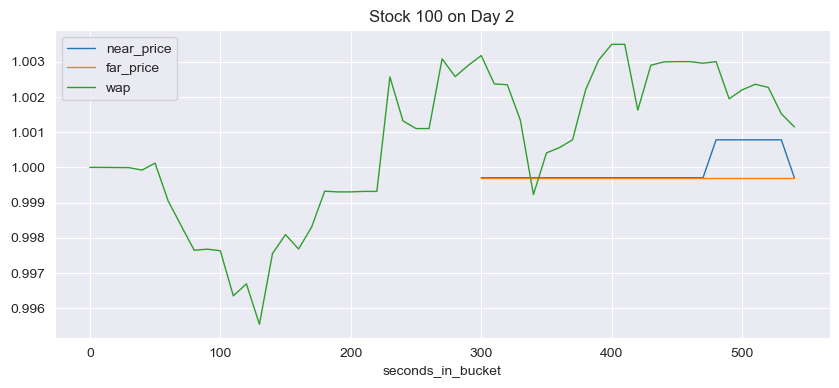

In [126]:
time_series_plot(
    df=train_df, 
    cols=['near_price', 'far_price','wap'], 
    stock_id = 100,
    date_id = 2
)

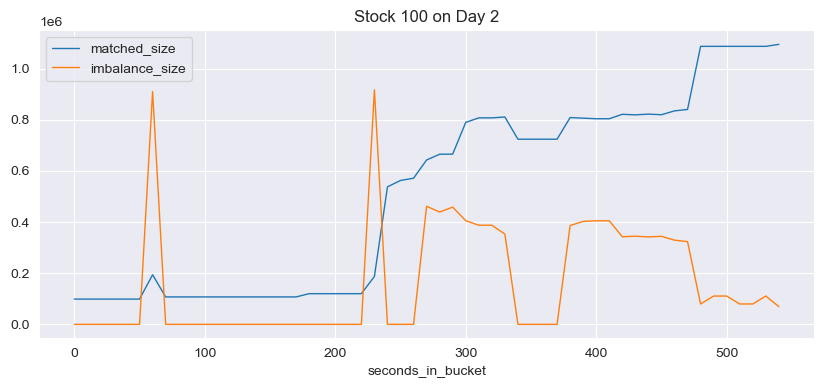

In [127]:
time_series_plot(
    df=train_df, 
    cols=['matched_size', 'imbalance_size'], 
    stock_id = 100,
    date_id = 2
)

In [153]:
def show_size(df_, cols, seconds=300):
    size_df = df_.loc[train_df['seconds_in_bucket']>=seconds, ['seconds_in_bucket']+cols]
    sns.lineplot(size_df.groupby(['seconds_in_bucket'])[cols].mean())

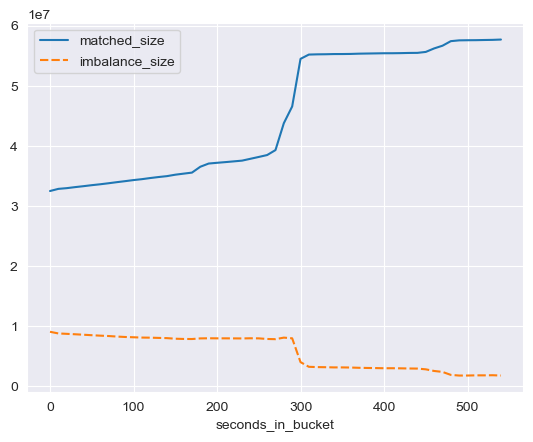

In [154]:
show_size(train_df, seconds=0, cols=['matched_size', 'imbalance_size'])

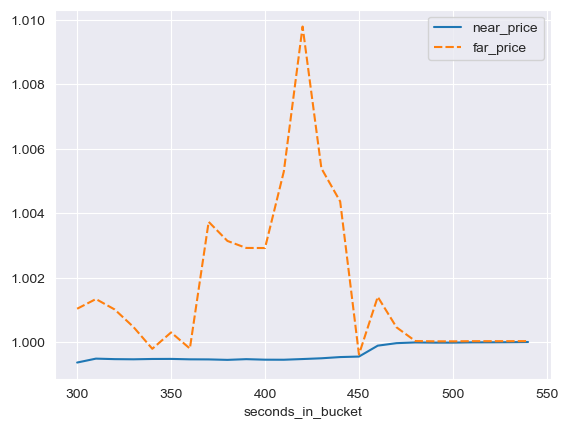

In [155]:
show_size(train_df, seconds=0, cols=['near_price', 'far_price'])

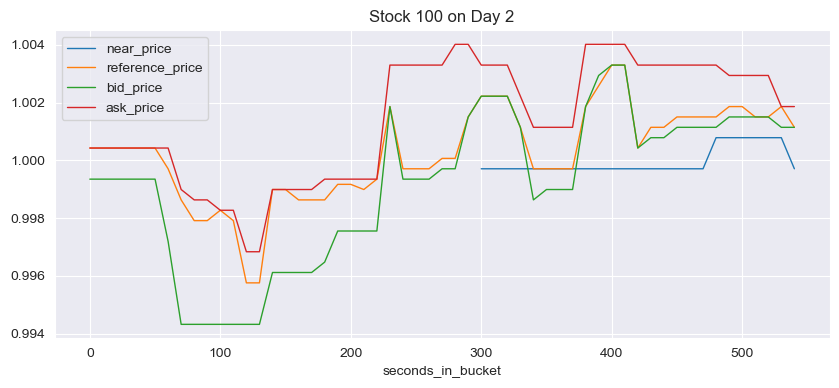

In [150]:
time_series_plot(
    df=train_df, 
    cols=['near_price', 'reference_price', 'bid_price', 'ask_price'], 
    stock_id = 100,
    date_id = 2
)

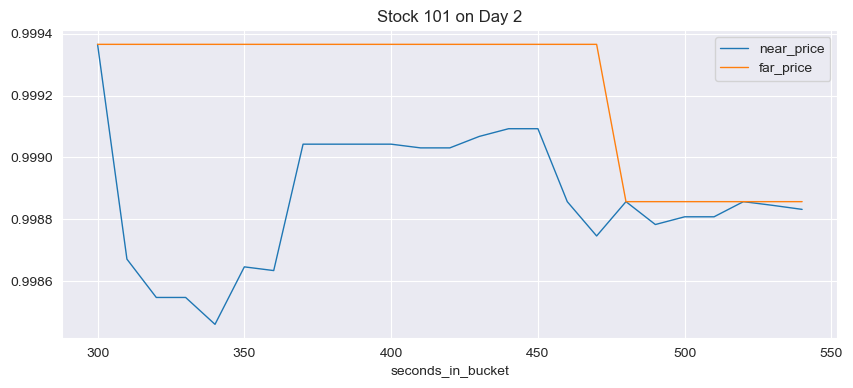

In [152]:
time_series_plot(
    df=train_df, 
    cols=['near_price', 'far_price'], 
    stock_id = 101,
    date_id = 2
)